# Imports

In [41]:
# generic data science libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#import pickle
import pickle

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

# Gather Data

In [2]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Clean Data

# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [4]:
# No Null, No Strings

In [5]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,0.730631,1.945368,-0.337243,5.549368,0.320715,-0.320715,2.391190e+04,130.789186,-130.789186,121.194193,19.483454,-40.352509,1095.152768,8.263769e+03,3.599918e+03,-4.302621e+03,276.038764,1.233729,5700.682449,143.898155,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,3.346956,9.401850,1.349036,6.425205,0.665352,0.665352,8.241240e+04,4689.233030,4689.233030,3519.737626,436.752064,1366.939375,856.234809,1.775255e+05,5.607270e+04,9.924848e+04,824.788481,0.650089,802.060405,46.566511,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.167000,0.000000,-20.200000,7.500000e+00,0.000000,-388600.000000,0.140000,0.000000,-77180.000000,92.000000,2.000000e-02,0.000000e+00,-5.600031e+06,1.600000,1.000000,2661.000000,0.000000,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,0.198000,0.039900,-0.446000,2.446000,0.048900,-0.334000,1.604000e+02,9.400000,-48.000000,1.400000,0.240000,-2.080000,554.000000,2.227000e+01,1.139000e+01,-3.068950e+02,12.400000,1.000000,5297.000000,105.000000,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,0.539000,0.189800,-0.204000,3.793000,0.137000,-0.137000,4.245000e+02,20.200000,-20.200000,2.420000,0.520000,-0.310000,888.000000,1.466700e+02,8.090000e+01,-4.443000e+01,23.700000,1.000000,5757.000000,156.000000,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,0.891000,0.379000,-0.044000,6.197500,0.334000,-0.048900,1.533250e+03,48.000000,-9.400000,15.965000,2.650000,-0.140000,1397.500000,9.006700e+02,5.529550e+02,-6.400000e+00,82.250000,1.000000,6110.000000,174.000000,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,8.000000,15896.000000,676.000000,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


In [6]:
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [7]:
df.groupby("koi_disposition").size()

koi_disposition
CANDIDATE         1687
CONFIRMED         1800
FALSE POSITIVE    3504
dtype: int64

In [8]:
# LABEL ENCODING FOR TARGET
target_labels = []

for ind, row in df.iterrows():
    if row["koi_disposition"] == "CANDAIDATE":
        target_labels.append(0)
    elif row["koi_disposition"] == "CONFIRMED":
        target_labels.append(1)
    else:
        target_labels.append(2)

df["koi_disposition_target"] = target_labels

In [9]:
df_sub = df.drop("koi_disposition", axis=1)

# Correlations

In [12]:
df_sub.corr()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_target
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,0.072748,-0.012333,-0.059048,0.287118,0.337558,-0.337558,-0.043942,0.031922,-0.031922,0.054410,0.061662,-0.051273,-0.003013,-0.000566,0.017538,-0.002140,-0.079241,0.035902,0.105008,0.129444,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643,0.238897
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,0.042021,0.130379,0.054633,0.014224,-0.181716,0.181716,0.423883,0.003900,-0.003900,-0.000752,0.004241,0.003393,0.191842,0.031315,0.030962,-0.023719,0.439764,-0.184721,0.104600,0.222332,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009,0.319232
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,0.007501,0.097642,0.002609,-0.048398,-0.004961,0.004961,-0.132939,-0.011108,0.011108,-0.013284,-0.015563,0.012901,0.259045,0.018086,0.016958,-0.011543,-0.134479,-0.122911,0.016750,0.159761,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023,0.292284
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,-0.004913,0.030568,0.011326,0.023232,0.025359,-0.025359,-0.088001,-0.003062,0.003062,-0.011078,-0.013318,0.009913,0.218624,0.034874,0.045647,-0.028259,-0.091905,-0.103976,0.012411,0.120078,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932,0.221597
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,0.067571,0.012136,-0.074607,0.324488,0.373670,-0.373670,-0.064272,0.038614,-0.038614,0.072790,0.052353,-0.070736,-0.390006,-0.021743,-0.029905,0.020268,-0.081456,-0.022590,0.021806,0.036838,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959,0.148964
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,0.028068,-0.004699,-0.039732,0.268469,0.529821,-0.529821,-0.069138,0.009823,-0.009823,0.030522,0.021726,-0.030554,-0.229438,-0.011772,-0.016157,0.010945,-0.082299,0.021398,0.032776,0.078357,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097,0.136189
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,-0.028068,0.004699,0.039732,-0.268469,-0.529821,0.529821,0.069138,-0.009823,0.009823,-0.030522,-0.021726,0.030554,0.229438,0.011772,0.016157,-0.010945,0.082299,-0.021398,-0.032776,-0.078357,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097,-0.136189
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,0.055597,0.044399,-0.065649,0.200979,0.228485,-0.228485,-0.037195,0.055597,-0.055597,0.039814,0.041496,-0.037977,-0.315510,-0.021307,-0.028232,0.020156,-0.058522,-0.006344,0.003641,0.039981,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898,0.069910
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,0.023150,-0.015680,-0.035277,0.199305,0.519143,-0.519143,-0.110431,0.015094,-0.015094,0.014575,0.031086,-0.013119,-0.1

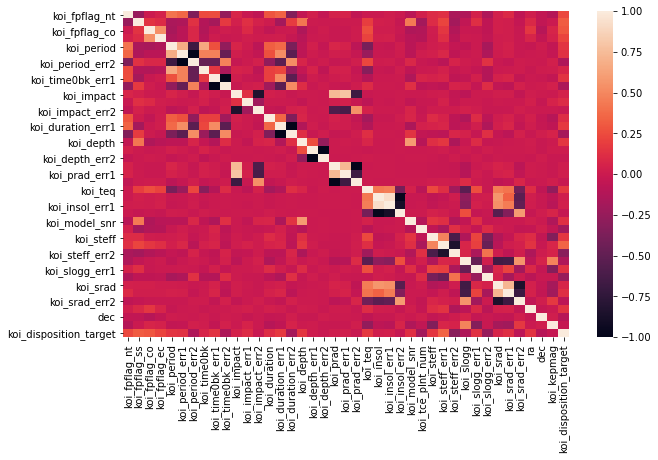

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sub.corr())
plt.show()

# Machine Learning

In [14]:
df_sub.corr()["koi_disposition_target"]

koi_fpflag_nt             0.238897
koi_fpflag_ss             0.319232
koi_fpflag_co             0.292284
koi_fpflag_ec             0.221597
koi_period                0.148964
koi_period_err1           0.136189
koi_period_err2          -0.136189
koi_time0bk               0.069910
koi_time0bk_err1          0.140761
koi_time0bk_err2         -0.140761
koi_impact                0.053848
koi_impact_err1           0.104294
koi_impact_err2          -0.011155
koi_duration              0.116252
koi_duration_err1         0.178151
koi_duration_err2        -0.178151
koi_depth                 0.162251
koi_depth_err1            0.013694
koi_depth_err2           -0.013694
koi_prad                  0.019792
koi_prad_err1             0.025619
koi_prad_err2            -0.017220
koi_teq                   0.171832
koi_insol                 0.026207
koi_insol_err1            0.035723
koi_insol_err2           -0.024717
koi_model_snr             0.128858
koi_tce_plnt_num         -0.187862
koi_steff           

In [15]:
# get pandas columns for prediction
target = df_sub["koi_disposition_target"]
features = df_sub.drop(["koi_disposition_target"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [16]:
# train the model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           1       0.66      0.53      0.58      1407
           2       0.85      0.91      0.88      4185

    accuracy                           0.81      5592
   macro avg       0.75      0.72      0.73      5592
weighted avg       0.80      0.81      0.80      5592


Confusion Matrix - In Sample
[[ 739  668]
 [ 385 3800]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           1       0.69      0.50      0.58       393
           2       0.82      0.91      0.87      1006

    accuracy                           0.80      1399
   macro avg       0.76      0.71      0.72      1399
weighted avg       0.79      0.80      0.79      1399


Confusion Matrix - Out Sample
[[197 196]
 [ 87 919]]


/Users/alexarnold/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Low 

### Decision Tree Classifier

In [32]:
# train the model
dt = DecisionTreeClassifier(random_state=27)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1407
           2       1.00      1.00      1.00      4185

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1407    0]
 [   0 4185]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           1       0.75      0.72      0.73       393
           2       0.89      0.91      0.90      1006

    accuracy                           0.85      1399
   macro avg       0.82      0.81      0.82      1399
weighted avg       0.85      0.85      0.85      1399


Confusion Matrix - Out Sample
[[281 112]
 [ 93 913]]


In [19]:
# Overpredicted in-sample set.

### Random Forest Classifier

In [33]:
# train the model
rf = RandomForestClassifier(random_state=27, n_estimators=100)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1407
           2       1.00      1.00      1.00      4185

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1407    0]
 [   0 4185]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           1       0.84      0.78      0.81       393
           2       0.92      0.94      0.93      1006

    accuracy                           0.89      1399
   macro avg       0.88      0.86      0.87      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix - Out Sample
[[306  87]
 [ 60 946]]


In [21]:
# Over predicted in-sample set, like Decision Tree, which makes sense as forest is a group of decision trees.
# Higher accuracy score on out of sample set.

### Ada Boost

In [34]:
# train the model
ada = AdaBoostClassifier(random_state=27)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           1       0.80      0.86      0.83      1407
           2       0.95      0.93      0.94      4185

    accuracy                           0.91      5592
   macro avg       0.87      0.89      0.88      5592
weighted avg       0.91      0.91      0.91      5592


Confusion Matrix - In Sample
[[1208  199]
 [ 306 3879]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           1       0.81      0.82      0.82       393
           2       0.93      0.93      0.93      1006

    accuracy                           0.90      1399
   macro avg       0.87      0.87      0.87      1399
weighted avg       0.90      0.90      0.90      1399


Confusion Matrix - Out Sample
[[322  71]
 [ 74 932]]


In [23]:
# Does not over fit in-sample set. Highest accuracy score without overfitting.

### Gradient Boost

In [35]:
# train the model
gb = GradientBoostingClassifier(random_state=27)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           1       0.85      0.88      0.86      1407
           2       0.96      0.95      0.95      4185

    accuracy                           0.93      5592
   macro avg       0.90      0.91      0.91      5592
weighted avg       0.93      0.93      0.93      5592


Confusion Matrix - In Sample
[[1234  173]
 [ 224 3961]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           1       0.85      0.83      0.84       393
           2       0.93      0.94      0.94      1006

    accuracy                           0.91      1399
   macro avg       0.89      0.88      0.89      1399
weighted avg       0.91      0.91      0.91      1399


Confusion Matrix - Out Sample
[[325  68]
 [ 59 947]]


In [25]:
# Highest accuracy score without overfitting.

### XGB

In [36]:
# train the model
xgb = XGBClassifier(random_state=27)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

/Users/alexarnold/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:47:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1407
           2       1.00      1.00      1.00      4185

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592


Confusion Matrix - In Sample
[[1407    0]
 [   0 4185]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           1       0.84      0.82      0.83       393
           2       0.93      0.94      0.94      1006

    accuracy                           0.91      1399
   macro avg       0.89 

In [28]:
# in-sample overfit

### KNN

In [37]:
# train the model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#get predictions
in_sample_preds = knn.predict(X_train)
out_sample_preds = knn.predict(X_test)

# get evaluation report
print("KNN Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

KNN Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           1       0.69      0.69      0.69      1407
           2       0.90      0.90      0.90      4185

    accuracy                           0.84      5592
   macro avg       0.79      0.79      0.79      5592
weighted avg       0.84      0.84      0.84      5592


Confusion Matrix - In Sample
[[ 974  433]
 [ 434 3751]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           1       0.64      0.61      0.62       393
           2       0.85      0.87      0.86      1006

    accuracy                           0.79      1399
   macro avg       0.75      0.74      0.74      1399
weighted avg       0.79      0.79      0.79      1399


Confusion Matrix - Out Sample
[[238 155]
 [133 873]]


In [30]:
# low score

# Model Selection

In [31]:
# I chose the Gradient Boost Model as it is the model with the highest accuracy scores for both in and out of sample data without overfitting the data.

# Train the Model + Grid Search

In [38]:
# train the model
gb = GradientBoostingClassifier(random_state=27)
gb.fit(X, y)

#get predictions
in_sample_preds = gb.predict(X)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y, in_sample_preds))
print()
print()

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           1       0.85      0.88      0.86      1800
           2       0.96      0.95      0.95      5191

    accuracy                           0.93      6991
   macro avg       0.90      0.91      0.91      6991
weighted avg       0.93      0.93      0.93      6991


Confusion Matrix - In Sample
[[1578  222]
 [ 278 4913]]




# Save Model

In [40]:
# save the model to disk
filename = 'alex_arnold.sav'
pickle.dump(gb, open(filename, 'wb'))

# Prepare Testing Data